In [2]:
# KAGGLE directory setup 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heartbeat-sounds/set_a_timing.csv
/kaggle/input/heartbeat-sounds/set_b.csv
/kaggle/input/heartbeat-sounds/set_a.csv
/kaggle/input/heartbeat-sounds/set_a/artifact__201106131834.wav
/kaggle/input/heartbeat-sounds/set_a/Aunlabelledtest__201106061215.wav
/kaggle/input/heartbeat-sounds/set_a/artifact__201106101955.wav
/kaggle/input/heartbeat-sounds/set_a/normal__201101151127.wav
/kaggle/input/heartbeat-sounds/set_a/artifact__201106220340.wav
/kaggle/input/heartbeat-sounds/set_a/artifact__201105190800.wav
/kaggle/input/heartbeat-sounds/set_a/normal__201102201230.wav
/kaggle/input/heartbeat-sounds/set_a/Aunlabelledtest__201108222241.wav
/kaggle/input/heartbeat-sounds/set_a/murmur__201102052338.wav
/kaggle/input/heartbeat-sounds/set_a/Aunlabelledtest__201106191034.wav
/kaggle/input/heartbeat-sounds/set_a/artifact__201106040722.wav
/kaggle/input/heartbeat-sounds/set_a/artifact__201106070949.wav
/kaggle/input/heartbeat-sounds/set_a/artifact__201106221254.wav
/kaggle/input/heartbeat

### Libraries

In [3]:
# imports

import numpy as np 
import pandas as pd
import librosa as lr
from glob import glob
import matplotlib.pyplot as plt

### Data Import

In [4]:
# grab all the wav files in the dir folder

data_dir = '../input/heartbeat-sounds/set_a'
audio_files_set_a = glob(data_dir + '/*.wav')

In [5]:
# check 
print('data type: ',type(audio_files_set_a))
print('length: ',len(audio_files_set_a))
print('filepath: ',audio_files_set_a[40] )


data type:  <class 'list'>
length:  176
filepath:  ../input/heartbeat-sounds/set_a/normal__201105021804.wav


In [6]:
# Read in the first audio file, create the time array

audio, sfreq = lr.load(audio_files_set_a[40])
time = np.arange(0, len(audio)) / sfreq

In [7]:
# sanity check
print(len(audio))
print(len(time))

198450
198450


#### View raw data

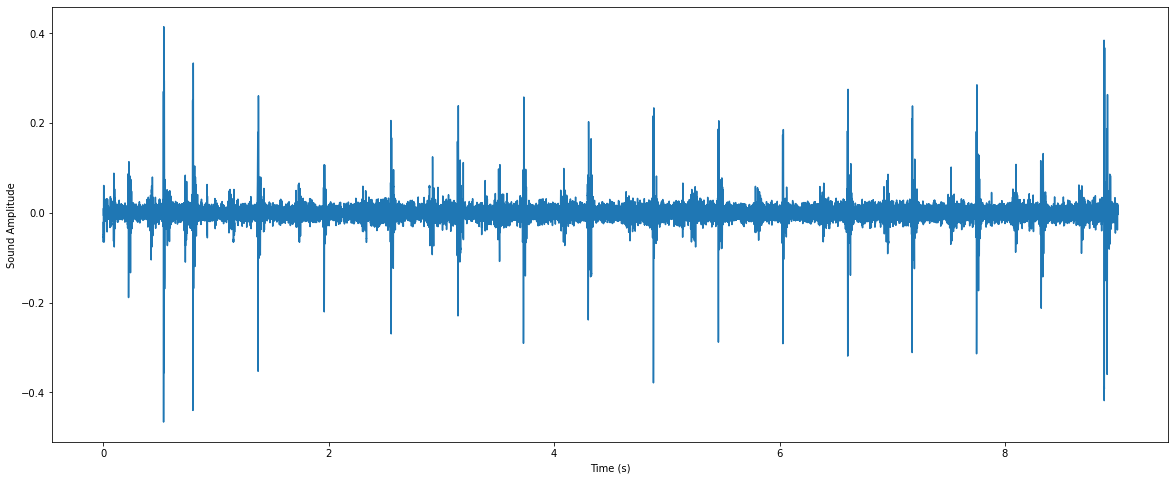

In [8]:
# plot audio over time
fig, ax = plt.subplots(figsize=(20,8))

ax.plot(time, audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')

plt.show()

#### Explore data

In [9]:
# Extract hb into categories

normal_list = [audio for audio in audio_files_set_a if 'normal' in audio]
artifact_list = [audio for audio in audio_files_set_a if 'artifact' in audio]
murmur_list =[audio for audio in audio_files_set_a if 'murmur' in audio]
extrahls_list =[audio for audio in audio_files_set_a if 'extrahls' in audio]
test_list =[audio for audio in audio_files_set_a if 'test' in audio]

abnormal_list = artifact_list + murmur_list + extrahls_list

print('normal : ',len(normal_list))
print('\n')
print('artifact : ',len(artifact_list))
print('murmur : ',len(murmur_list))
print('extrahls : ',len(extrahls_list))
print('total abnormal: ', len(abnormal_list))
print('\n')
print('test : ',len(test_list))

normal :  31


artifact :  40
murmur :  34
extrahls :  19
total abnormal:  93


test :  52


In [10]:
# extract normal hb's with same time length
equal_normal_list= []

for file in normal_list:
    audio, sfreq = lr.load(file)
    if len(audio)==198450:
        equal_normal_list.append(file)
        time = np.arange(0, len(audio)) / sfreq
#         print(audio_files_set_a.index(file), file, len(audio), len(time))

In [11]:
# extract abnormal hb's with same time length
equal_abnormal_list = []

for file in abnormal_list:
    audio, sfreq = lr.load(file)
    if len(audio)==198450:
        equal_abnormal_list.append(file)
        time = np.arange(0, len(audio)) / sfreq
#         print(audio_files_set_a.index(file), file, len(audio), len(time))

In [12]:
# create df of normal labelled, equal length hb's with time as the index
normal_df = pd.DataFrame(time, columns=['time'] )

for file in equal_normal_list:
    audio, sfreq = lr.load(file)
    num = equal_normal_list.index(file) # get index from list for clearer numbering in df
    num +=1
    
    normal_df[num] = audio 
    
normal_df = normal_df.set_index('time')
display(normal_df)

,1,2,3,4,5,6,7,8,9,10
time,,,,,,,,,,
0.000000,0.030288,0.000226,0.002664,-0.021740,0.000155,0.000732,-0.000052,0.012224,-0.002914,-0.000557
0.000045,0.045075,0.000273,0.003184,-0.032352,0.000039,0.000908,0.000022,0.017637,-0.005284,-0.000920
0.000091,0.039437,-0.000388,0.002231,-0.028362,-0.000095,0.000564,-0.000023,0.014871,-0.004794,-0.000363
0.000136,0.042953,-0.000169,0.002713,-0.030887,-0.000070,0.000400,-0.000010,0.016437,-0.004471,0.000185
0.000181,0.040853,-0.000060,0.001783,-0.028175,-0.000075,0.000510,-0.000092,0.015246,-0.003116,0.000260
...,...,...,...,...,...,...,...,...,...,...
8.999773,-0.090350,-0.000219,0.011347,0.015815,-0.001120,-0.000756,0.057686,0.000390,-0.001013,-0.000421
8.999819,-0.093764,-0.000042,0.012530,0.016943,-0.001173,-0.000823,0.059459,-0.000245,0.000442,-0.000343
8.999864,-0.095418,0.000030,0.013559,0.015973,-0.001081,-0.000928,0.059162,-0.000732,0.001365,-0.000797


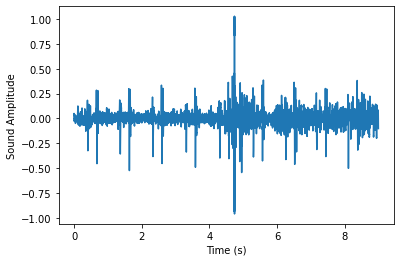

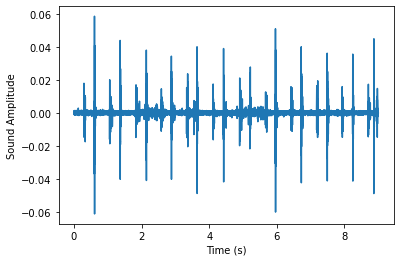

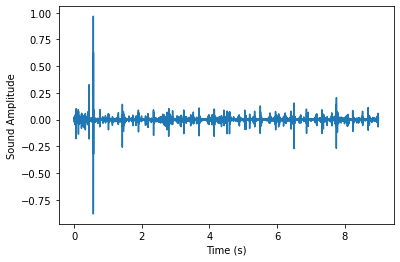

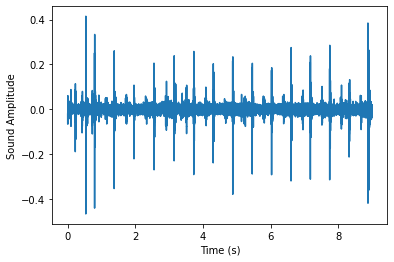

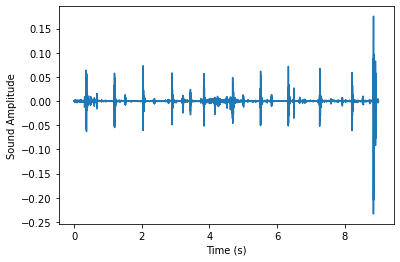

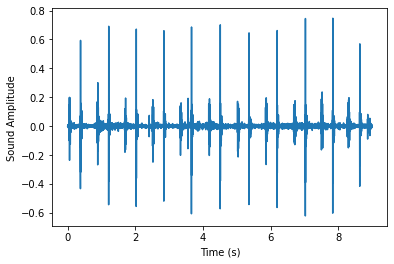

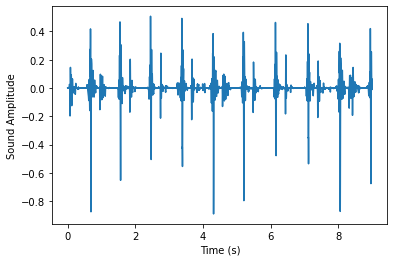

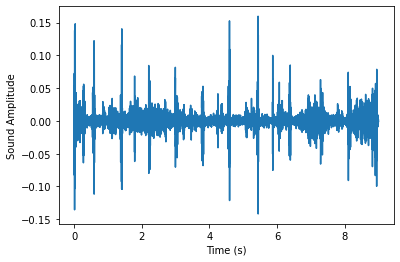

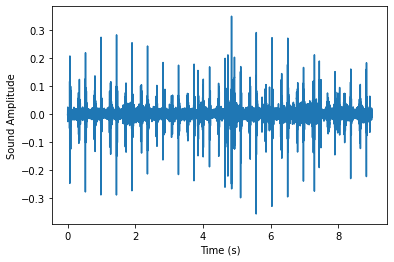

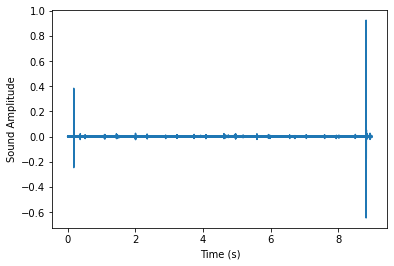

In [13]:
# View normal labelled, equal length beats as time series
for col in normal_df:
    fig, ax = plt.subplots()
    ax.plot(normal_df.index, normal_df[col])
    ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
    plt.show()

In [14]:
# # create df of abnormal labelled, equal length hb's 
abnormal_df = pd.DataFrame(time, columns=['time'] )

for file in equal_abnormal_list:
    audio, sfreq = lr.load(file)
    num = equal_abnormal_list.index(file) # get index from list for clearer numbering in df
    num +=1
    
    abnormal_df[num] = audio 
    
abnormal_df = abnormal_df.set_index('time')
display(abnormal_df)

,1,2,3,4,5,6,7,8,9,10,...,40,41,42,43,44,45,46,47,48,49
time,,,,,,,,,,,,,,,,,,,,,
0.000000,0.074532,-0.088280,-0.083804,0.001240,0.454286,-0.063466,-0.064459,-0.013115,-1.170115e-05,-0.000604,...,0.000030,0.008107,-0.000257,-0.000240,-0.003403,0.000156,-0.000044,-0.005781,0.007372,-0.030123
0.000045,0.175606,-0.058748,-0.128165,0.001863,0.794240,-0.046924,-0.047421,-0.030231,1.725820e-06,-0.000152,...,-0.000158,0.011740,0.000065,-0.000341,-0.004822,0.000390,0.000085,-0.008485,0.010857,-0.046489
0.000091,0.239556,-0.113308,-0.076807,0.001534,0.787422,0.142464,0.021683,0.064947,3.516106e-06,0.000033,...,-0.000083,0.009631,0.000933,-0.000020,-0.003886,-0.000085,0.000139,-0.006306,0.010795,-0.042016
0.000136,0.315163,0.060025,-0.049318,0.000728,0.819899,0.406653,0.061909,0.088280,5.446142e-07,0.000198,...,-0.000023,0.010838,0.002252,0.000092,-0.003896,-0.000263,0.000074,-0.005934,0.013874,-0.045355
0.000181,0.375872,-0.126075,-0.041851,0.000338,0.689268,0.603585,0.117361,0.047481,1.394578e-06,0.000531,...,0.000065,0.010588,0.002773,-0.000024,-0.003301,-0.000681,-0.000030,-0.005540,0.013727,-0.043114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8.999773,-0.662827,0.607738,-0.000960,-0.021356,-0.072739,0.042731,0.002636,0.469079,4.553168e-03,-0.001820,...,0.000009,0.063049,0.008006,-0.000235,0.002883,-0.006123,-0.000006,0.003657,0.004441,-0.000157
8.999819,-0.700519,0.617176,-0.001924,-0.017494,-0.271959,0.039467,0.000800,-0.465367,2.086377e-03,-0.001859,...,0.000152,0.063849,0.007647,-0.000355,0.002646,-0.005906,0.000026,0.003910,0.003432,0.000260
8.999864,-0.706473,0.614513,-0.003512,0.002084,-0.427272,0.025442,0.000257,0.119565,-1.216600e-03,-0.001635,...,0.000077,0.062137,0.007039,-0.000404,0.002429,-0.006919,0.000051,0.003231,0.002346,-0.000054


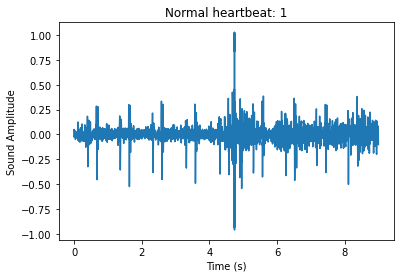

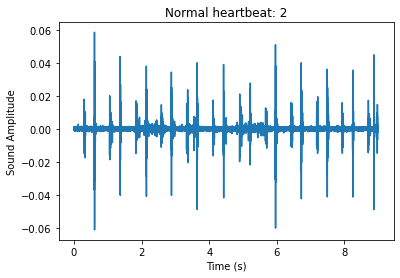

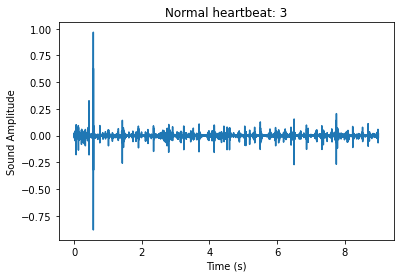

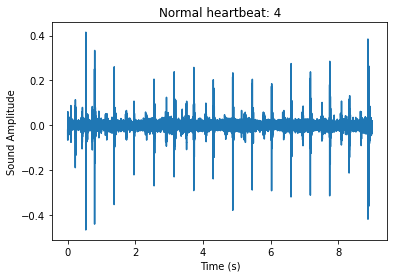

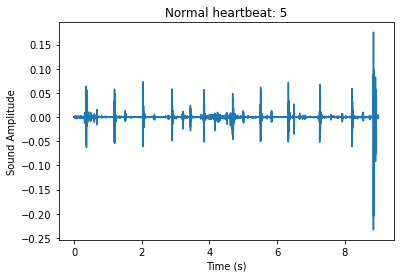

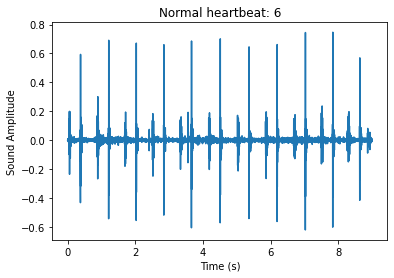

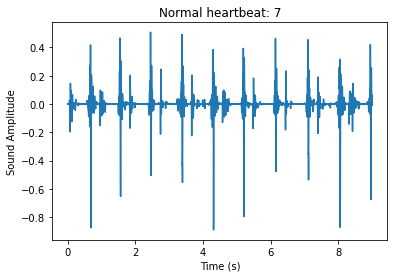

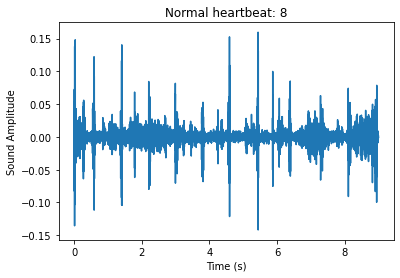

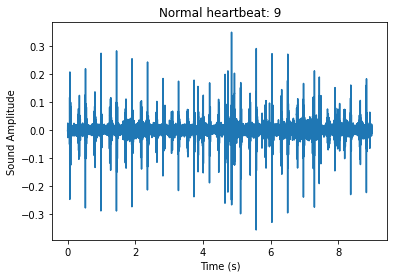

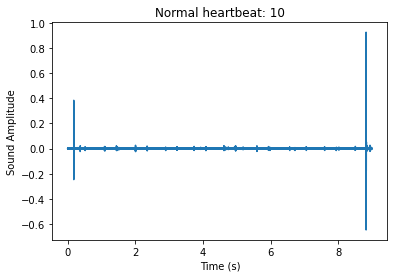

In [15]:
# View Normal beats as time series
for col in normal_df:
    fig, ax = plt.subplots()
    ax.plot(normal_df.index, normal_df[col])
    ax.set(xlabel='Time (s)', ylabel='Sound Amplitude', title = f'Normal heartbeat: {col}')
    plt.show()

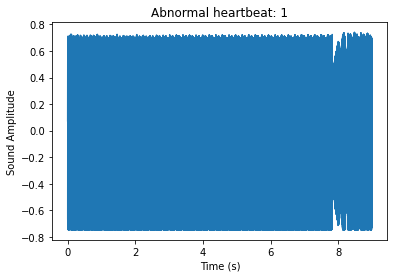

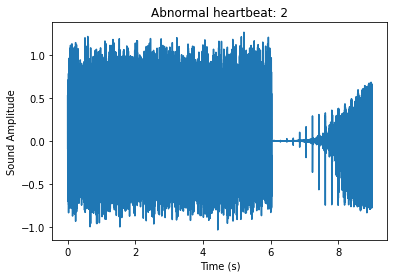

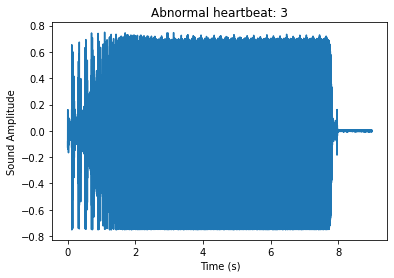

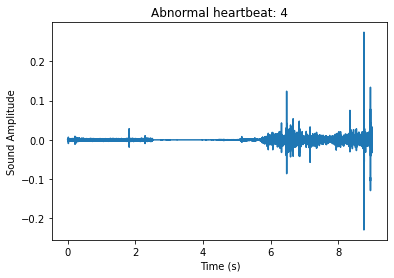

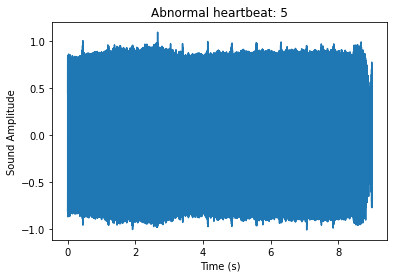

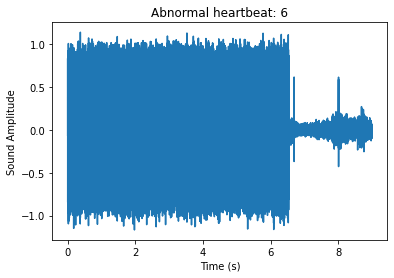

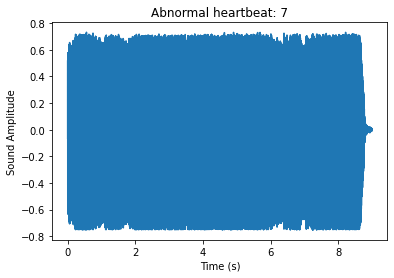

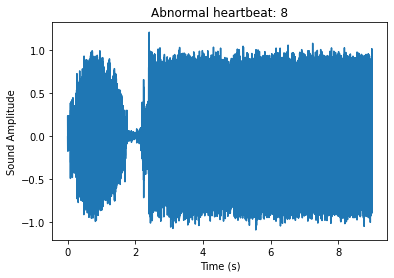

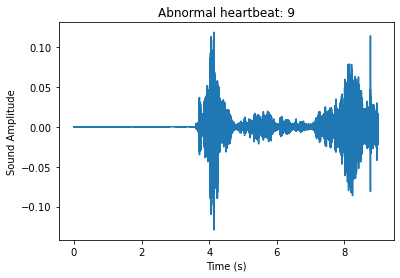

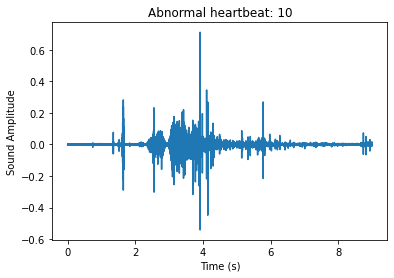

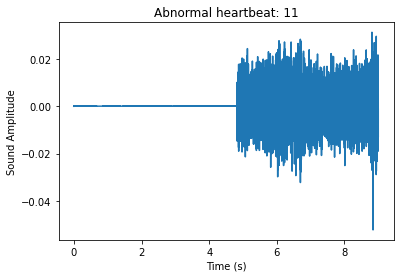

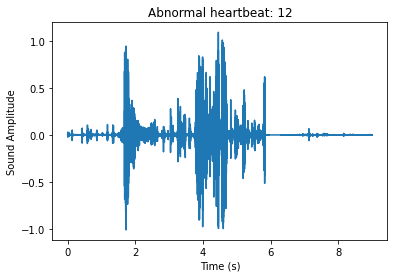

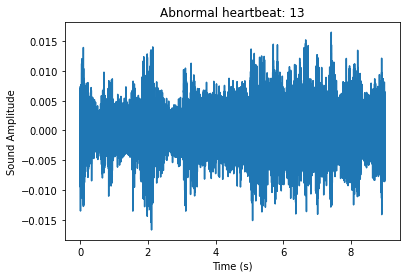

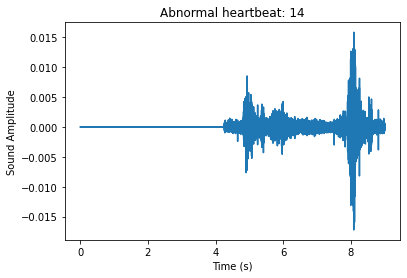

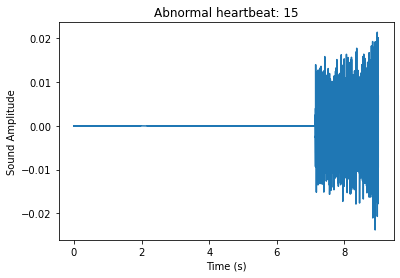

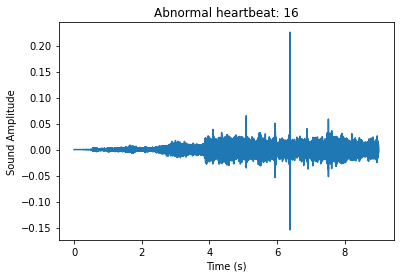

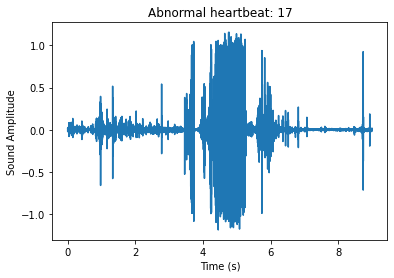

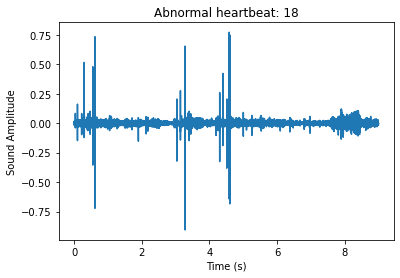

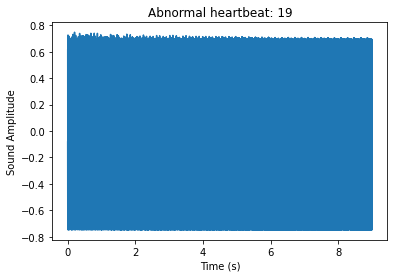

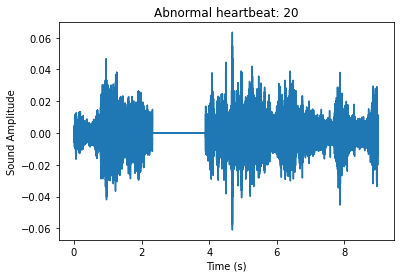

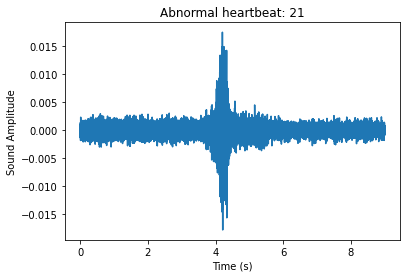

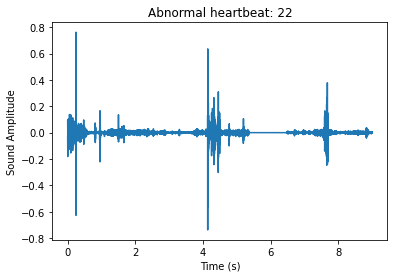

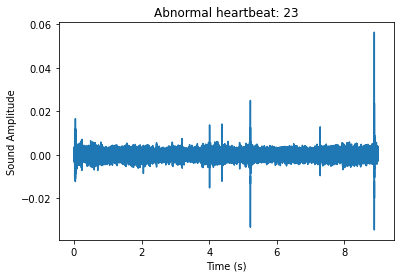

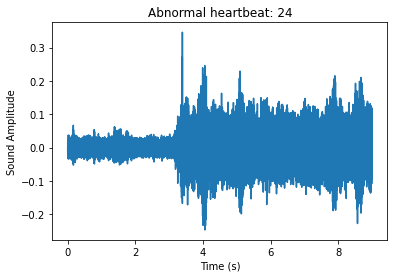

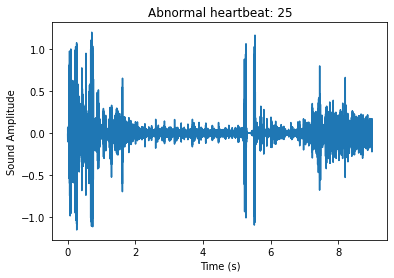

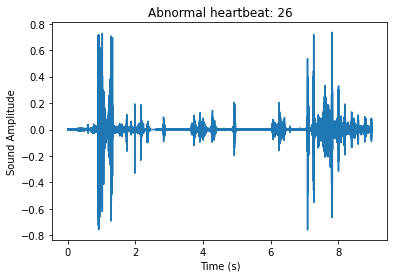

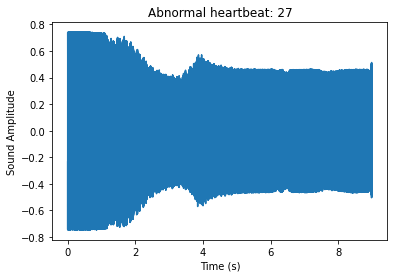

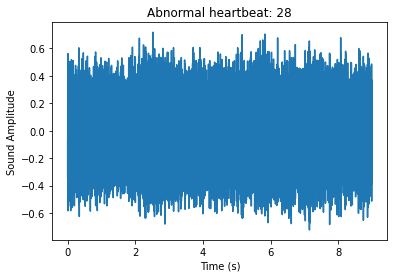

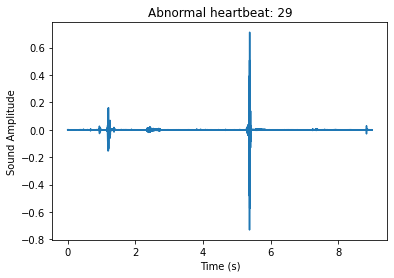

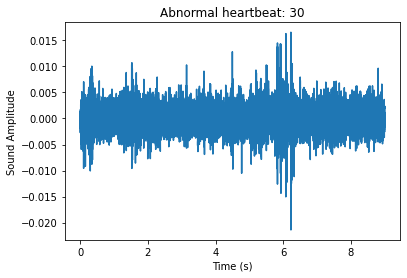

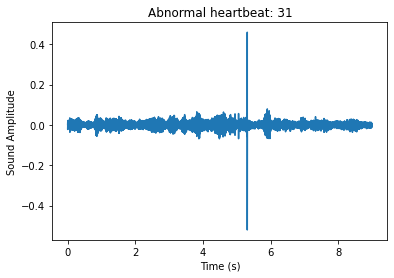

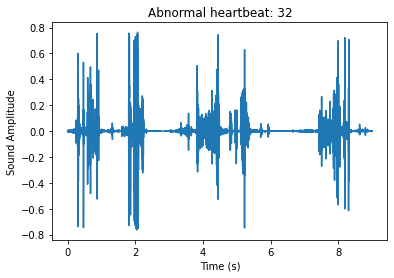

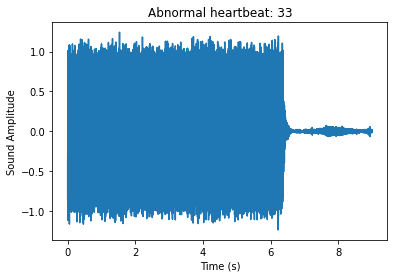

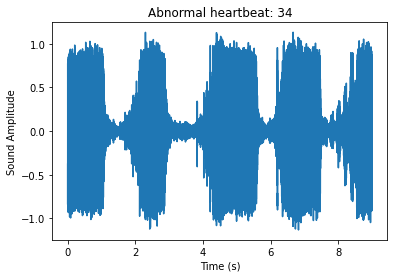

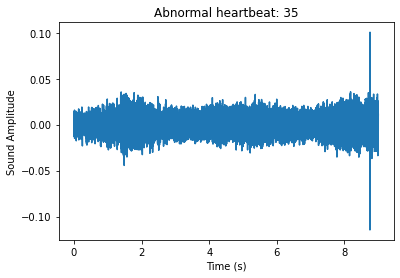

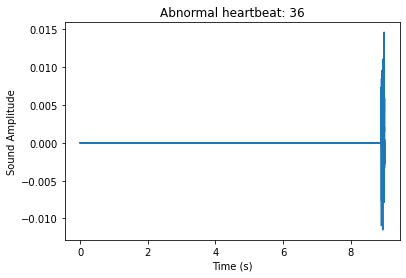

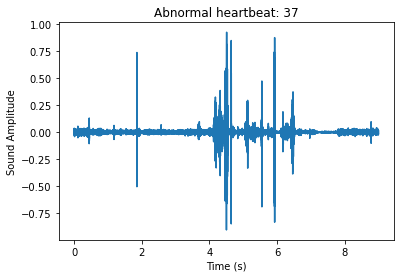

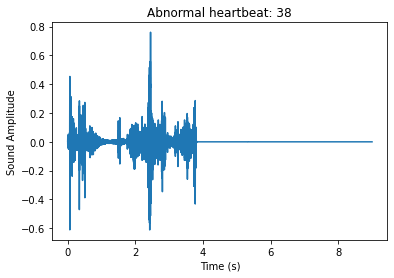

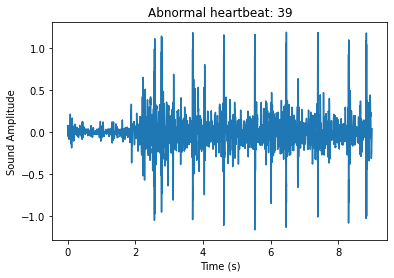

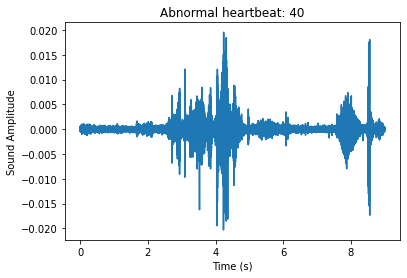

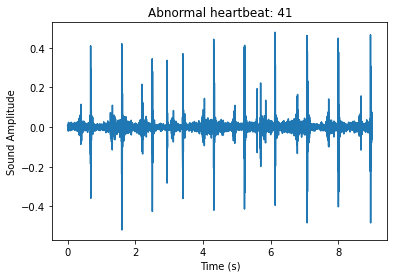

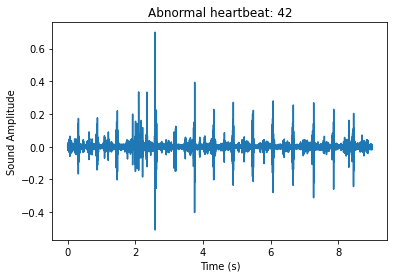

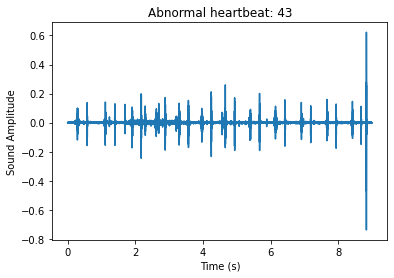

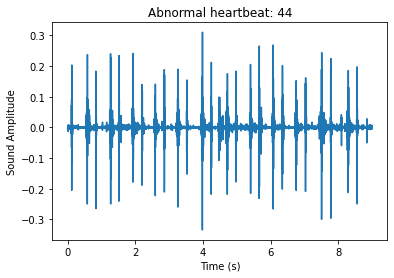

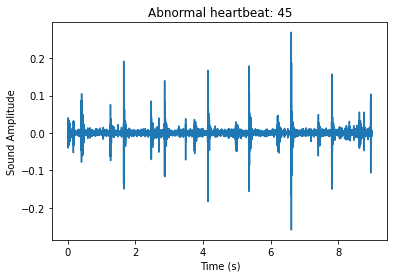

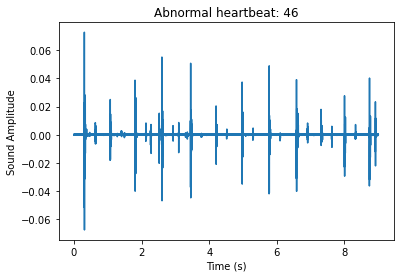

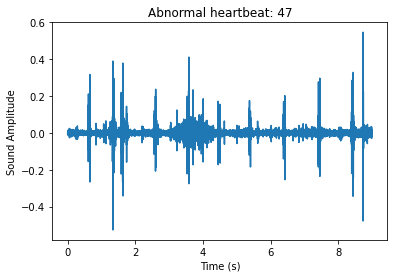

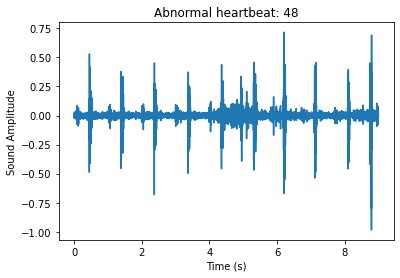

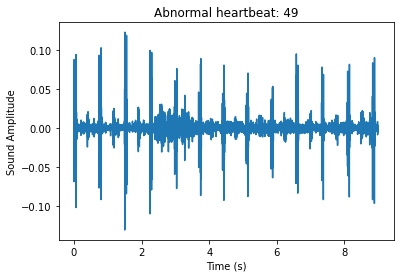

In [16]:
# View Abnormal beats as time series
for col in abnormal_df:
    fig, ax = plt.subplots()
    ax.plot(abnormal_df.index, abnormal_df[col])
    ax.set(xlabel='Time (s)', ylabel='Sound Amplitude',title = f'Abnormal heartbeat: {col}')
    plt.show()

### Feature engineering with means, min, max, stds

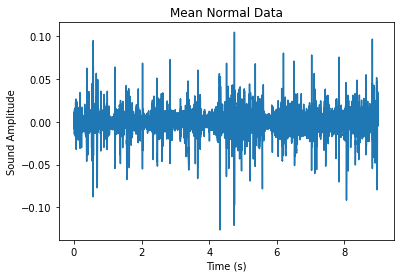

In [17]:
# View mean normal hb
mean_normal = np.mean(normal_df, axis=1)

fig, ax = plt.subplots()
ax.plot(mean_normal.index, mean_normal.values)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude', title='Mean Normal Data')
plt.show()

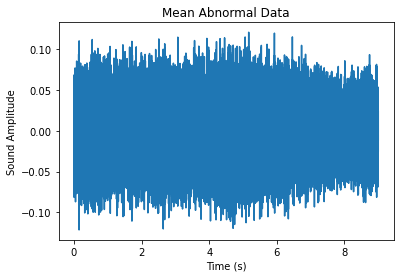

In [18]:
# View mean abnormal hb
mean_abnormal = np.mean(abnormal_df, axis=1)

fig, ax = plt.subplots()
ax.plot(mean_abnormal.index, mean_abnormal.values)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude', title='Mean Abnormal Data')
plt.show()

In [19]:
# create a new df with labels and features for model
avgs = []
mins = []
maxs = []
stds = []
labels = []
audio_list = []
time_list = []
audio_length = []


for file in abnormal_list:
    audio, sfreq = lr.load(file)
    time = np.arange(0, len(audio)) / sfreq
    avgs.append(np.mean(audio))
    mins.append(np.min(audio))
    maxs.append(np.max(audio))
    stds.append(np.std(audio))
    labels.append('abnormal')
    audio_list.append(audio)
    time_list.append(time)
    audio_length.append(len(audio))
    
for file in normal_list:
    audio, sfreq = lr.load(file)
    time = np.arange(0, len(audio)) / sfreq
    avgs.append(np.mean(audio))
    mins.append(np.min(audio))
    maxs.append(np.max(audio))
    stds.append(np.std(audio))
    labels.append('normal')
    audio_list.append(audio)
    time_list.append(time)
    audio_length.append(len(audio))
    
df = pd.DataFrame(list(zip(avgs, mins, maxs, stds, labels, audio_list, time_list, audio_length)),
                  columns =['mean', 'min', 'max', 'std', 'label', 'audio', 'time', 'audio_length'])  

display(df.info())

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mean          124 non-null    float32
 1   min           124 non-null    float32
 2   max           124 non-null    float32
 3   std           124 non-null    float32
 4   label         124 non-null    object 
 5   audio         124 non-null    object 
 6   time          124 non-null    object 
 7   audio_length  124 non-null    int64  
dtypes: float32(4), int64(1), object(3)
memory usage: 5.9+ KB


None

,mean,min,max,std,label,audio,time,audio_length
0,-0.000028,-0.747552,0.741028,0.491565,abnormal,"[0.07453186, 0.17560594, 0.23955597, 0.3151632...","[0.0, 4.5351473922902495e-05, 9.07029478458049...",198450
1,0.001811,-1.033482,1.260568,0.290001,abnormal,"[-0.08828017, -0.05874822, -0.11330845, 0.0600...","[0.0, 4.5351473922902495e-05, 9.07029478458049...",198450
2,-0.000177,-0.753313,0.749640,0.412772,abnormal,"[-0.08380434, -0.12816496, -0.07680728, -0.049...","[0.0, 4.5351473922902495e-05, 9.07029478458049...",198450
3,0.000010,-0.229126,0.273754,0.004334,abnormal,"[0.0012399036, 0.0018628261, 0.00153411, 0.000...","[0.0, 4.5351473922902495e-05, 9.07029478458049...",198450
4,0.000007,-1.010290,1.098236,0.560723,abnormal,"[0.45428565, 0.7942397, 0.7874225, 0.81989855,...","[0.0, 4.5351473922902495e-05, 9.07029478458049...",198450
...,...,...,...,...,...,...,...,...
119,0.000036,-0.488585,0.376690,0.083061,normal,"[-0.0022123447, -0.003605405, -0.0033032708, -...","[0.0, 4.5351473922902495e-05, 9.07029478458049...",174979
120,0.000019,-0.383861,0.418755,0.060423,normal,"[0.0025488369, 0.004175392, 0.004084804, 0.004...","[0.0, 4.5351473922902495e-05, 9.07029478458049...",174979
121,-0.000003,-0.646474,0.924454,0.009998,normal,"[-0.0005567948, -0.0009203571, -0.00036257223,...","[0.0, 4.5351473922902495e-05, 9.07029478458049...",198450
122,-0.000018,-0.090070,0.095189,0.011692,normal,"[0.000502413, 0.00038450933, 0.00039873237, 0....","[0.0, 4.5351473922902495e-05, 9.07029478458049...",176707


In [20]:
# drop unneeded cols
df_drop_cols = df.drop(['audio', 'time', 'audio_length', 'label'], axis=1)

In [21]:
# preprocessing (if needed)
from sklearn.preprocessing import StandardScaler, LabelEncoder

scaler = StandardScaler()
processed_df = scaler.fit_transform(df_drop_cols)

y = df['label']
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(y) 

In [22]:
# train, initialize and fit model, generate predictions and score
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df_drop_cols, y, test_size=0.33, stratify=y, random_state=42)

model = LinearSVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred)) 

# score = model.score(X_test, y_test) #alternate to calculate score
# print(score)

0.7560975609756098


### Feature engineering with auditory envelope

In [24]:
# Auditory envelope

complete_list = abnormal_list + normal_list

audio_list = []

for file in complete_list:
    audio, sfreq = lr.load(file)
    time = np.arange(0, len(audio)) / sfreq
    audio_list.append(audio)
    time_list.append(time)

# create df with all hb's (of different lengths) with time as index
audio_df = pd.DataFrame(audio_list).T
audio_df['time'] = time_list[0]
audio_df = audio_df.set_index('time')

audio_df.head()

,0,1,2,3,4,5,6,7,8,9,...,114,115,116,117,118,119,120,121,122,123
time,,,,,,,,,,,,,,,,,,,,,
0.000000,0.074532,-0.088280,-0.083804,0.001240,0.454286,-0.063466,-0.064459,-0.013115,-1.170115e-05,-0.000604,...,-0.000052,-0.507745,0.006395,0.012224,-0.002914,-0.002212,0.002549,-0.000557,0.000502,-0.001421
0.000045,0.175606,-0.058748,-0.128165,0.001863,0.794240,-0.046924,-0.047421,-0.030231,1.725820e-06,-0.000152,...,0.000022,-0.749269,0.008523,0.017637,-0.005284,-0.003605,0.004175,-0.000920,0.000385,-0.001417
0.000091,0.239556,-0.113308,-0.076807,0.001534,0.787422,0.142464,0.021683,0.064947,3.516106e-06,0.000033,...,-0.000023,-0.645510,0.004083,0.014871,-0.004794,-0.003303,0.004085,-0.000363,0.000399,-0.000717
0.000136,0.315163,0.060025,-0.049318,0.000728,0.819899,0.406653,0.061909,0.088280,5.446142e-07,0.000198,...,-0.000010,-0.697066,0.001832,0.016437,-0.004471,-0.003425,0.004526,0.000185,0.000919,-0.000680
0.000181,0.375872,-0.126075,-0.041851,0.000338,0.689268,0.603585,0.117361,0.047481,1.394578e-06,0.000531,...,-0.000092,-0.644850,-0.001485,0.015246,-0.003116,-0.002965,0.004398,0.000260,0.000812,-0.001434


In [25]:
# technique to create audio envelope
audio_rectified = audio_df.apply(np.abs) # makes all values positive
audio_envelope = audio_rectified.rolling(50).mean() #mean of 50 samples per chunk 

audio_envelope

,0,1,2,3,4,5,6,7,8,9,...,114,115,116,117,118,119,120,121,122,123
time,,,,,,,,,,,,,,,,,,,,,
0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.000045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.000091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.000136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.000181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8.999773,0.430212,0.579105,0.000836,0.011808,0.355749,0.025978,0.003012,0.299574,0.007160,0.000801,...,0.048288,NaN,NaN,0.001180,0.004545,NaN,NaN,0.000714,NaN,NaN
8.999819,0.430470,0.578989,0.000850,0.012130,0.358441,0.026230,0.002987,0.305801,0.006929,0.000817,...,0.048755,NaN,NaN,0.001136,0.004381,NaN,NaN,0.000704,NaN,NaN
8.999864,0.430684,0.578509,0.000896,0.012055,0.361517,0.026145,0.002941,0.304230,0.006707,0.000836,...,0.049208,NaN,NaN,0.001107,0.004260,NaN,NaN,0.000715,NaN,NaN


#### View same beat after different extractions

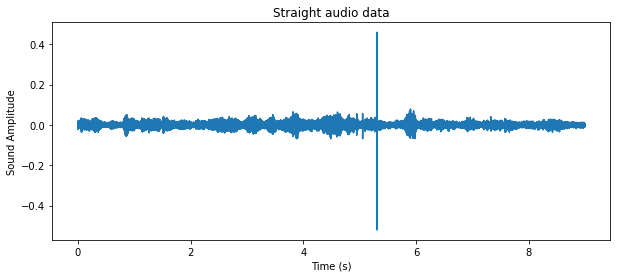

In [26]:
fig, ax = plt.subplots(figsize=(10,4))

ax.plot(audio_df.index, audio_df[30])
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude', title = 'Straight audio data')

plt.show()

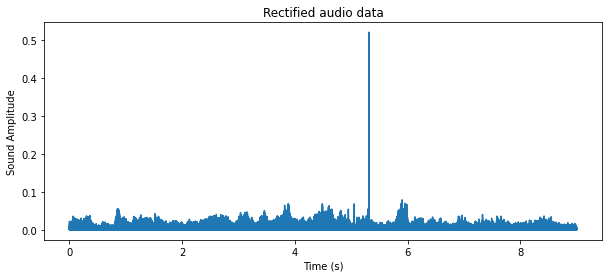

In [27]:
fig, ax = plt.subplots(figsize=(10,4))

ax.plot(audio_rectified.index, audio_rectified[30])
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude', title='Rectified audio data')

plt.show()

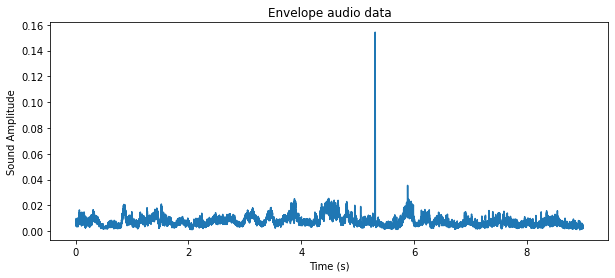

In [28]:
fig, ax = plt.subplots(figsize=(10,4))

ax.plot(audio_envelope.index, audio_envelope[30])
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude',title='Envelope audio data')

plt.show()

### Train model on features engineered with auditory envelope

In [29]:
# Calculate stats
means = np.mean(audio_envelope, axis=0)
stds = np.std(audio_envelope, axis=0)
maxs = np.max(audio_envelope, axis=0)

# Create the X and y arrays
X = np.column_stack([means, stds, maxs])
y = labels

# Fit the model and score on testing data
from sklearn.model_selection import cross_val_score

percent_score = cross_val_score(model, X, y, cv=5)

print(np.mean(percent_score))

0.75


### Compute tempo and rhythm features for heartbeat data, and fit a model once more

In [30]:
audio_df_drop_na = audio_df.dropna() # following calculation errors if NaN present

In [32]:
%%capture --no-display 
# turn off warnings for this cell 


# Calculate the tempo of the sounds
tempos = []
for col, i_audio in audio_df_drop_na.items():
    tempos.append(lr.beat.tempo(i_audio.values, sr=sfreq, hop_length=2**6, aggregate=None))

# Convert the list to an array so you can manipulate it more easily
tempos = np.array(tempos)

# Calculate statistics of each tempo
tempos_mean = tempos.mean(axis=-1)
tempos_std = tempos.std(axis=-1)
tempos_max = tempos.max(axis=-1)

In [33]:
# Create the X and y arrays
X = np.column_stack([means, stds, maxs, tempos_mean, tempos_std, tempos_max])
y = labels

# Fit the model and score on testing data
percent_score = cross_val_score(model, X, y, cv=5)
print(np.mean(percent_score))

0.642


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


### Spectrograms of heartbeat audio

In [34]:
# load single audio file
audio, sfreq = lr.load(audio_files_set_a[40])
time = np.arange(0, len(audio)) / sfreq

In [36]:
# Import the short-time fourier transform (stft) function from librosa.core
from librosa.core import stft

# Calculate the spectral content (using the short-time fourier transform function) of audio
HOP_LENGTH = 2**4
spec = stft(audio, hop_length=HOP_LENGTH, n_fft=2**7)

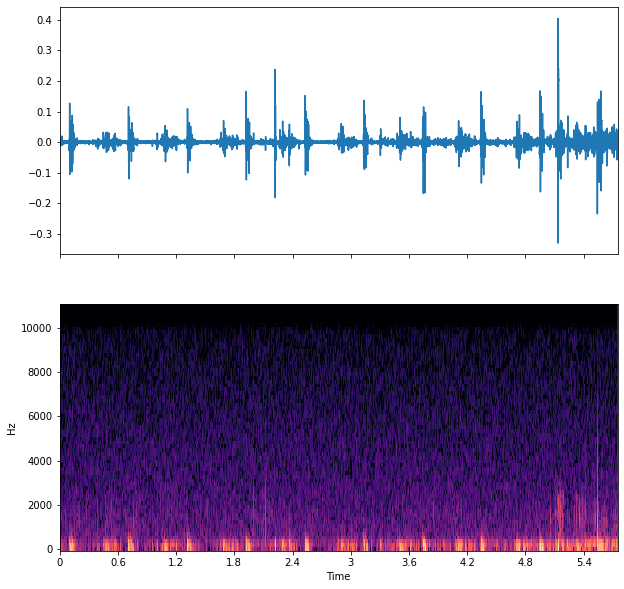

In [48]:
from librosa.core import amplitude_to_db
from librosa.display import specshow

# Convert the spectogram (spec) to decibels.
spec_db = amplitude_to_db(np.abs(spec))

# Compare the raw audio to the spectrogram of the audio
fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
axs[0].plot(time, audio)
specshow(spec_db, sr=sfreq, x_axis='time', y_axis='hz', hop_length=HOP_LENGTH, ax=axs[1])
plt.show()

#### There is a lot more information in a spectrogram compared to a raw audio file. 
- By computing the spectral features, you have a much better idea of what's going on. 
- As such, there are all kinds of spectral features that you can compute using the spectrogram as a base.

In [49]:
spec=np.abs(spec)

In [50]:
# Calculate the spectral centroid and bandwidth for the spectrogram
bandwidths = lr.feature.spectral_bandwidth(S=spec)[0]
centroids = lr.feature.spectral_centroid(S=spec)[0]

In [51]:
times_spec = lr.times_like(centroids)

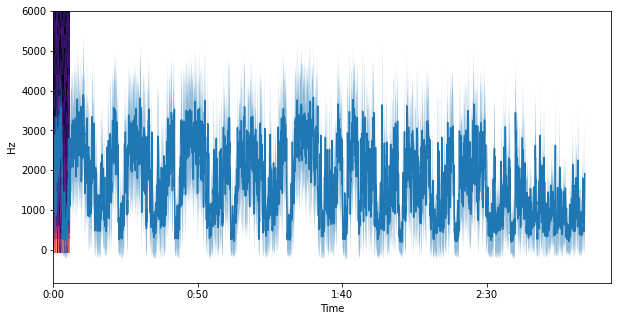

In [52]:
# Convert spectrogram to decibels for visualization
spec_db = amplitude_to_db(spec)

# Display these features on top of the spectrogram
fig, ax = plt.subplots(figsize=(10, 5))
specshow(spec_db, x_axis='time', y_axis='hz', hop_length=HOP_LENGTH, ax=ax)
ax.plot(times_spec, centroids)
ax.fill_between(times_spec, centroids - bandwidths / 2, centroids + bandwidths / 2, alpha=.5)
ax.set(ylim=[None, 6000])
plt.show()

### Combing many features into a classifier

In [59]:
HOP_LENGTH = 2**4

spectrograms = []

for file in complete_list:
    audio, sfreq = lr.load(file)
    time = np.arange(0, len(audio)) / sfreq
    # Calculate the spectral content (using the short-time fourier transform function) of audio
    spec = stft(audio, hop_length=HOP_LENGTH, n_fft=2**7)
    spectrograms.append(spec)

In [61]:
# Loop through each spectrogram
bandwidths = []
centroids = []

for spec in spectrograms:
    # Calculate the mean spectral bandwidth
    this_mean_bandwidth = np.mean(lr.feature.spectral_bandwidth(S=np.abs(spec)))
    # Calculate the mean spectral centroid
    this_mean_centroid = np.mean(lr.feature.spectral_centroid(S=np.abs(spec)))
    # Collect the values
    bandwidths.append(this_mean_bandwidth)  
    centroids.append(this_mean_centroid)

In [66]:
# Create X and y arrays
X = np.column_stack([means, stds, maxs, tempos_mean, tempos_max, tempos_std, bandwidths, centroids])
y = labels

# Fit the model and score on testing data
percent_score = cross_val_score(model, X, y, cv=5)
print(np.mean(percent_score))

0.734


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
